# Import Library

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Explore Gambaran Besar Dataset

In [117]:
df = pd.read_csv("loan_data_2007_2014.csv")

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [119]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Duplicate Value Check

In [120]:
df[df.duplicated(subset=['id'])]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [121]:
df[df.duplicated(subset=['member_id'])]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [122]:
df[df.duplicated()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [123]:
#drop unused column
df.drop(['policy_code',
         'url',
         'sub_grade',
         'title',
         'addr_state',
         'zip_code',
         'policy_code',
         'application_type',
         'emp_title','Unnamed: 0','id','member_id','desc','funded_amnt_inv'],axis=1,inplace=True)

# Handle Missing Value

In [124]:
df.shape

(466285, 62)

In [125]:
df.isna().sum().sort_values(ascending=False)

inq_last_12m                 466285
open_rv_12m                  466285
open_il_6m                   466285
open_acc_6m                  466285
verification_status_joint    466285
                              ...  
total_rec_prncp                   0
funded_amnt                       0
total_rec_late_fee                0
recoveries                        0
total_rec_int                     0
Length: 62, dtype: int64

In [126]:
total_null = df.isna().sum()
percent_missing = df.isna().sum() * 100 / len(df)
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'percent_missing': percent_missing})
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 50].index.tolist()
col_full_null

['mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [127]:
#drop missing value > 50%
df.drop(columns=col_full_null, inplace = True)

In [128]:
df.isna().sum().sort_values(ascending=False)

next_pymnt_d                  227214
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
emp_length                     21008
last_pymnt_d                     376
revol_util                       340
collections_12_mths_ex_med       145
last_credit_pull_d                42
inq_last_6mths                    29
acc_now_delinq                    29
delinq_2yrs                       29
earliest_cr_line                  29
open_acc                          29
pub_rec                           29
total_acc                         29
annual_inc                         4
grade                              0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
home_ownership                     0
last_pymnt_amnt                    0
total_rec_prncp                    0
installment                        0
int_rate                           0
term                               0
t

In [129]:
#next_pymnt_d handle (dapat di drop)
df[df['next_pymnt_d'].notnull()]['next_pymnt_d']

4         Feb-16
6         Feb-16
32        Jan-16
39        Jan-16
61        Jan-16
           ...  
466274    Feb-16
466279    Feb-16
466280    Feb-16
466282    Feb-16
466284    Feb-16
Name: next_pymnt_d, Length: 239071, dtype: object

In [130]:
mode_value = df['next_pymnt_d'].mode()[0]
mode_value

'Feb-16'

In [131]:
df['next_pymnt_d'] = df['next_pymnt_d'].fillna(mode_value)

In [132]:
#top missing value handle

filtered = ['total_rev_hi_lim',
'tot_cur_bal',                
'tot_coll_amt',                  
'emp_length']

df[filtered]

,total_rev_hi_lim,tot_cur_bal,tot_coll_amt,emp_length
0,NaN,NaN,NaN,10+ years
1,NaN,NaN,NaN,< 1 year
2,NaN,NaN,NaN,10+ years
3,NaN,NaN,NaN,10+ years
4,NaN,NaN,NaN,1 year
...,...,...,...,...
466280,29900.0,294998.0,0.0,4 years
466281,39400.0,221830.0,0.0,10+ years
466282,13100.0,73598.0,0.0,7 years
466283,53100.0,591610.0,0.0,3 years


In [133]:
to_drop = ['total_rev_hi_lim',
'tot_cur_bal',                
'tot_coll_amt']

df.drop(columns=(to_drop), inplace=True)

In [134]:
#drop remaining null values
df.dropna(inplace=True)

In [135]:
df.shape

(444451, 39)

In [136]:
#kategori-kategori yang persentasenya kurang dari 5% dari total data akan digabungkan ke dalam kategori 'other'

In [137]:
#Feature Engineering
purpose_n = df['purpose'].value_counts()
purpose_percentage = purpose_n / len(df) * 100
threshold = 5

df['purpose'] = df['purpose'].apply(lambda x: x if purpose_percentage[x] >= threshold else 'other')

In [138]:
home_n = df['home_ownership'].value_counts()
percentage = home_n / len(df) * 100
threshold = 5

df['home_ownership'] = df['home_ownership'].apply(lambda x: x if percentage[x] > threshold else 'OTHER')

In [139]:
bad_stats = ['Charged Off',
             'Late (31-120 days)',
             'Late (16-30 days)',
             'Default',
             'Does not meet the credit policy. Status:Charged Off']

df['bad_loan'] = np.where(df['loan_status'].isin(bad_stats),1,0)

In [140]:
bad_loan = df[df['bad_loan'] == 1]
good_loan = df[df['bad_loan'] == 0]

In [141]:
#change 'term' to numerical column
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [142]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['next_pymnt_d'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

In [143]:
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-01-01


# EDA

In [144]:
#show unique values from each categorical column
def unqcol(data):
    for col in data.columns:
        x = data[col].unique()
        nunique = len(x)
        print(col," = ",nunique)
        print(col," = ",x)
        print("-"*30)
cat = df.select_dtypes(include='object')
unqcol(cat)

grade  =  7
grade  =  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
------------------------------
emp_length  =  11
emp_length  =  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
------------------------------
home_ownership  =  4
home_ownership  =  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
------------------------------
verification_status  =  3
verification_status  =  ['Verified' 'Source Verified' 'Not Verified']
------------------------------
loan_status  =  9
loan_status  =  ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
------------------------------
pymnt_plan  =  2
pymnt_plan  =  ['n' 'y']
------------------------------
purpose  =  4
purpose  =  ['credit_card' 'other' 'debt_consolidation' 'home_improvement']
------------------------------
initial_list_status  =  2
ini

In [145]:
#good loan = 0, bad loan = 1
df['bad_loan'].value_counts()

0    395552
1     48899
Name: bad_loan, dtype: int64

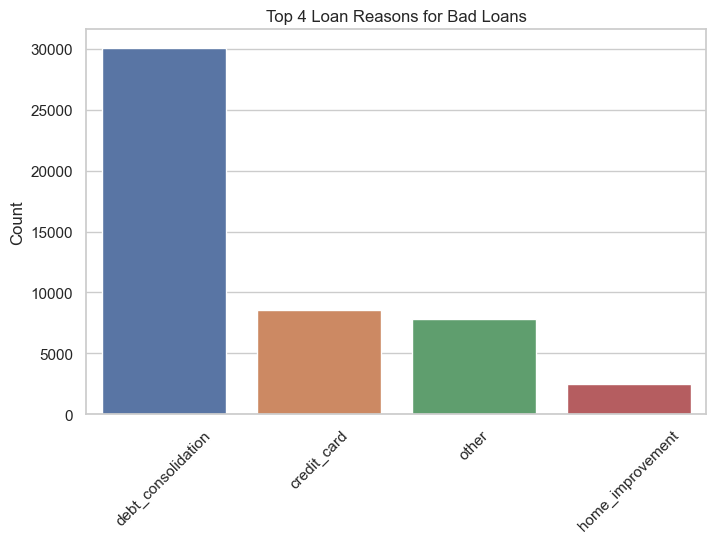

In [146]:
# Menghitung value counts untuk 'purpose' pada bad_loan
purpose_n_bad = bad_loan['purpose'].value_counts()

# Mengambil 4 kategori dengan nilai tertinggi
top_4_bad = purpose_n_bad.nlargest(4)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=top_4_bad.index, y=top_4_bad.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Top 4 Loan Reasons for Bad Loans')
plt.ylabel('Count')

plt.show()

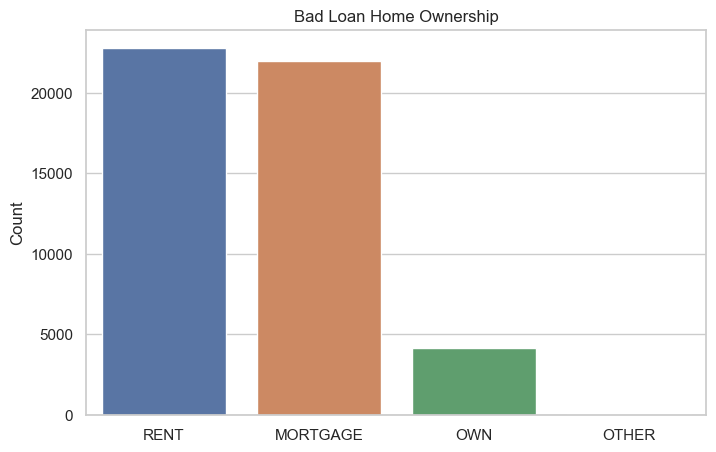

In [147]:
bad_home_n = bad_loan['home_ownership'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=bad_home_n.index, y=bad_home_n.values)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Bad Loan Home Ownership')
plt.ylabel('Count')

plt.show()

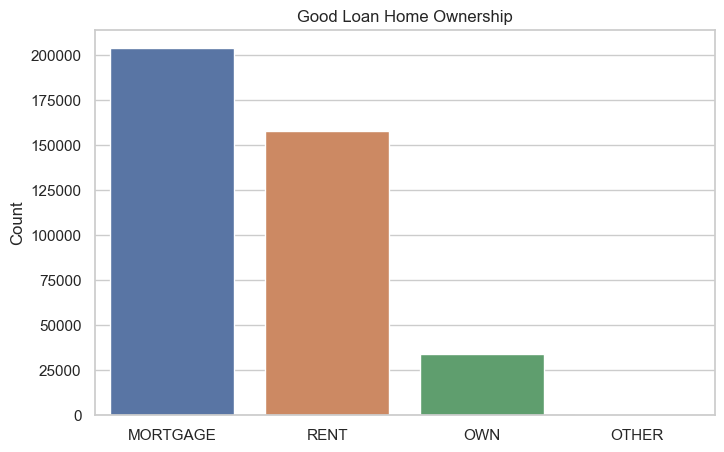

In [148]:
bad_home_n = good_loan['home_ownership'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=bad_home_n.index, y=bad_home_n.values)
ax.set_xticklabels(ax.get_xticklabels())
plt.title('Good Loan Home Ownership')
plt.ylabel('Count')

plt.show()

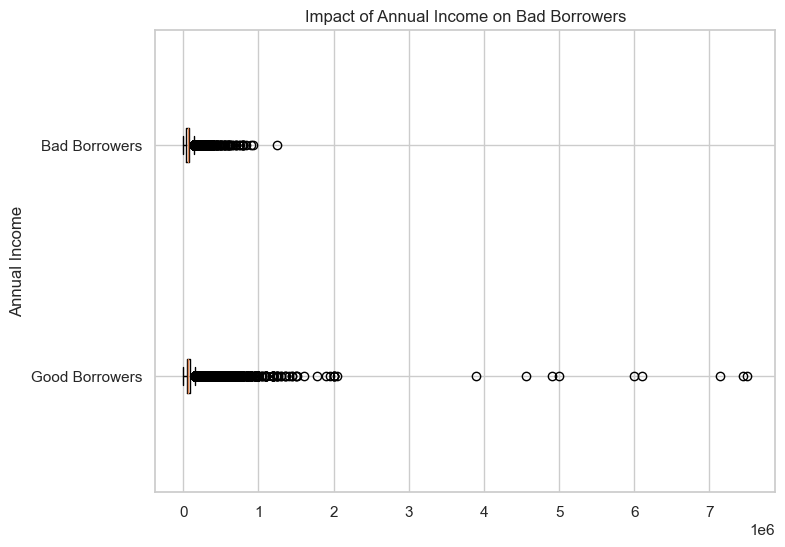

In [149]:
plt.figure(figsize=(8, 6))
plt.boxplot([good_loan['annual_inc'], bad_loan['annual_inc']], labels=['Good Borrowers', 'Bad Borrowers'],vert=False)
plt.title('Impact of Annual Income on Bad Borrowers')
plt.ylabel('Annual Income')
plt.show()

In [150]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
highcorr_col = [column for column in upper.columns if any(upper[column] > 0.8)]

In [151]:
highcorr_col

['funded_amnt',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp']

<AxesSubplot:>

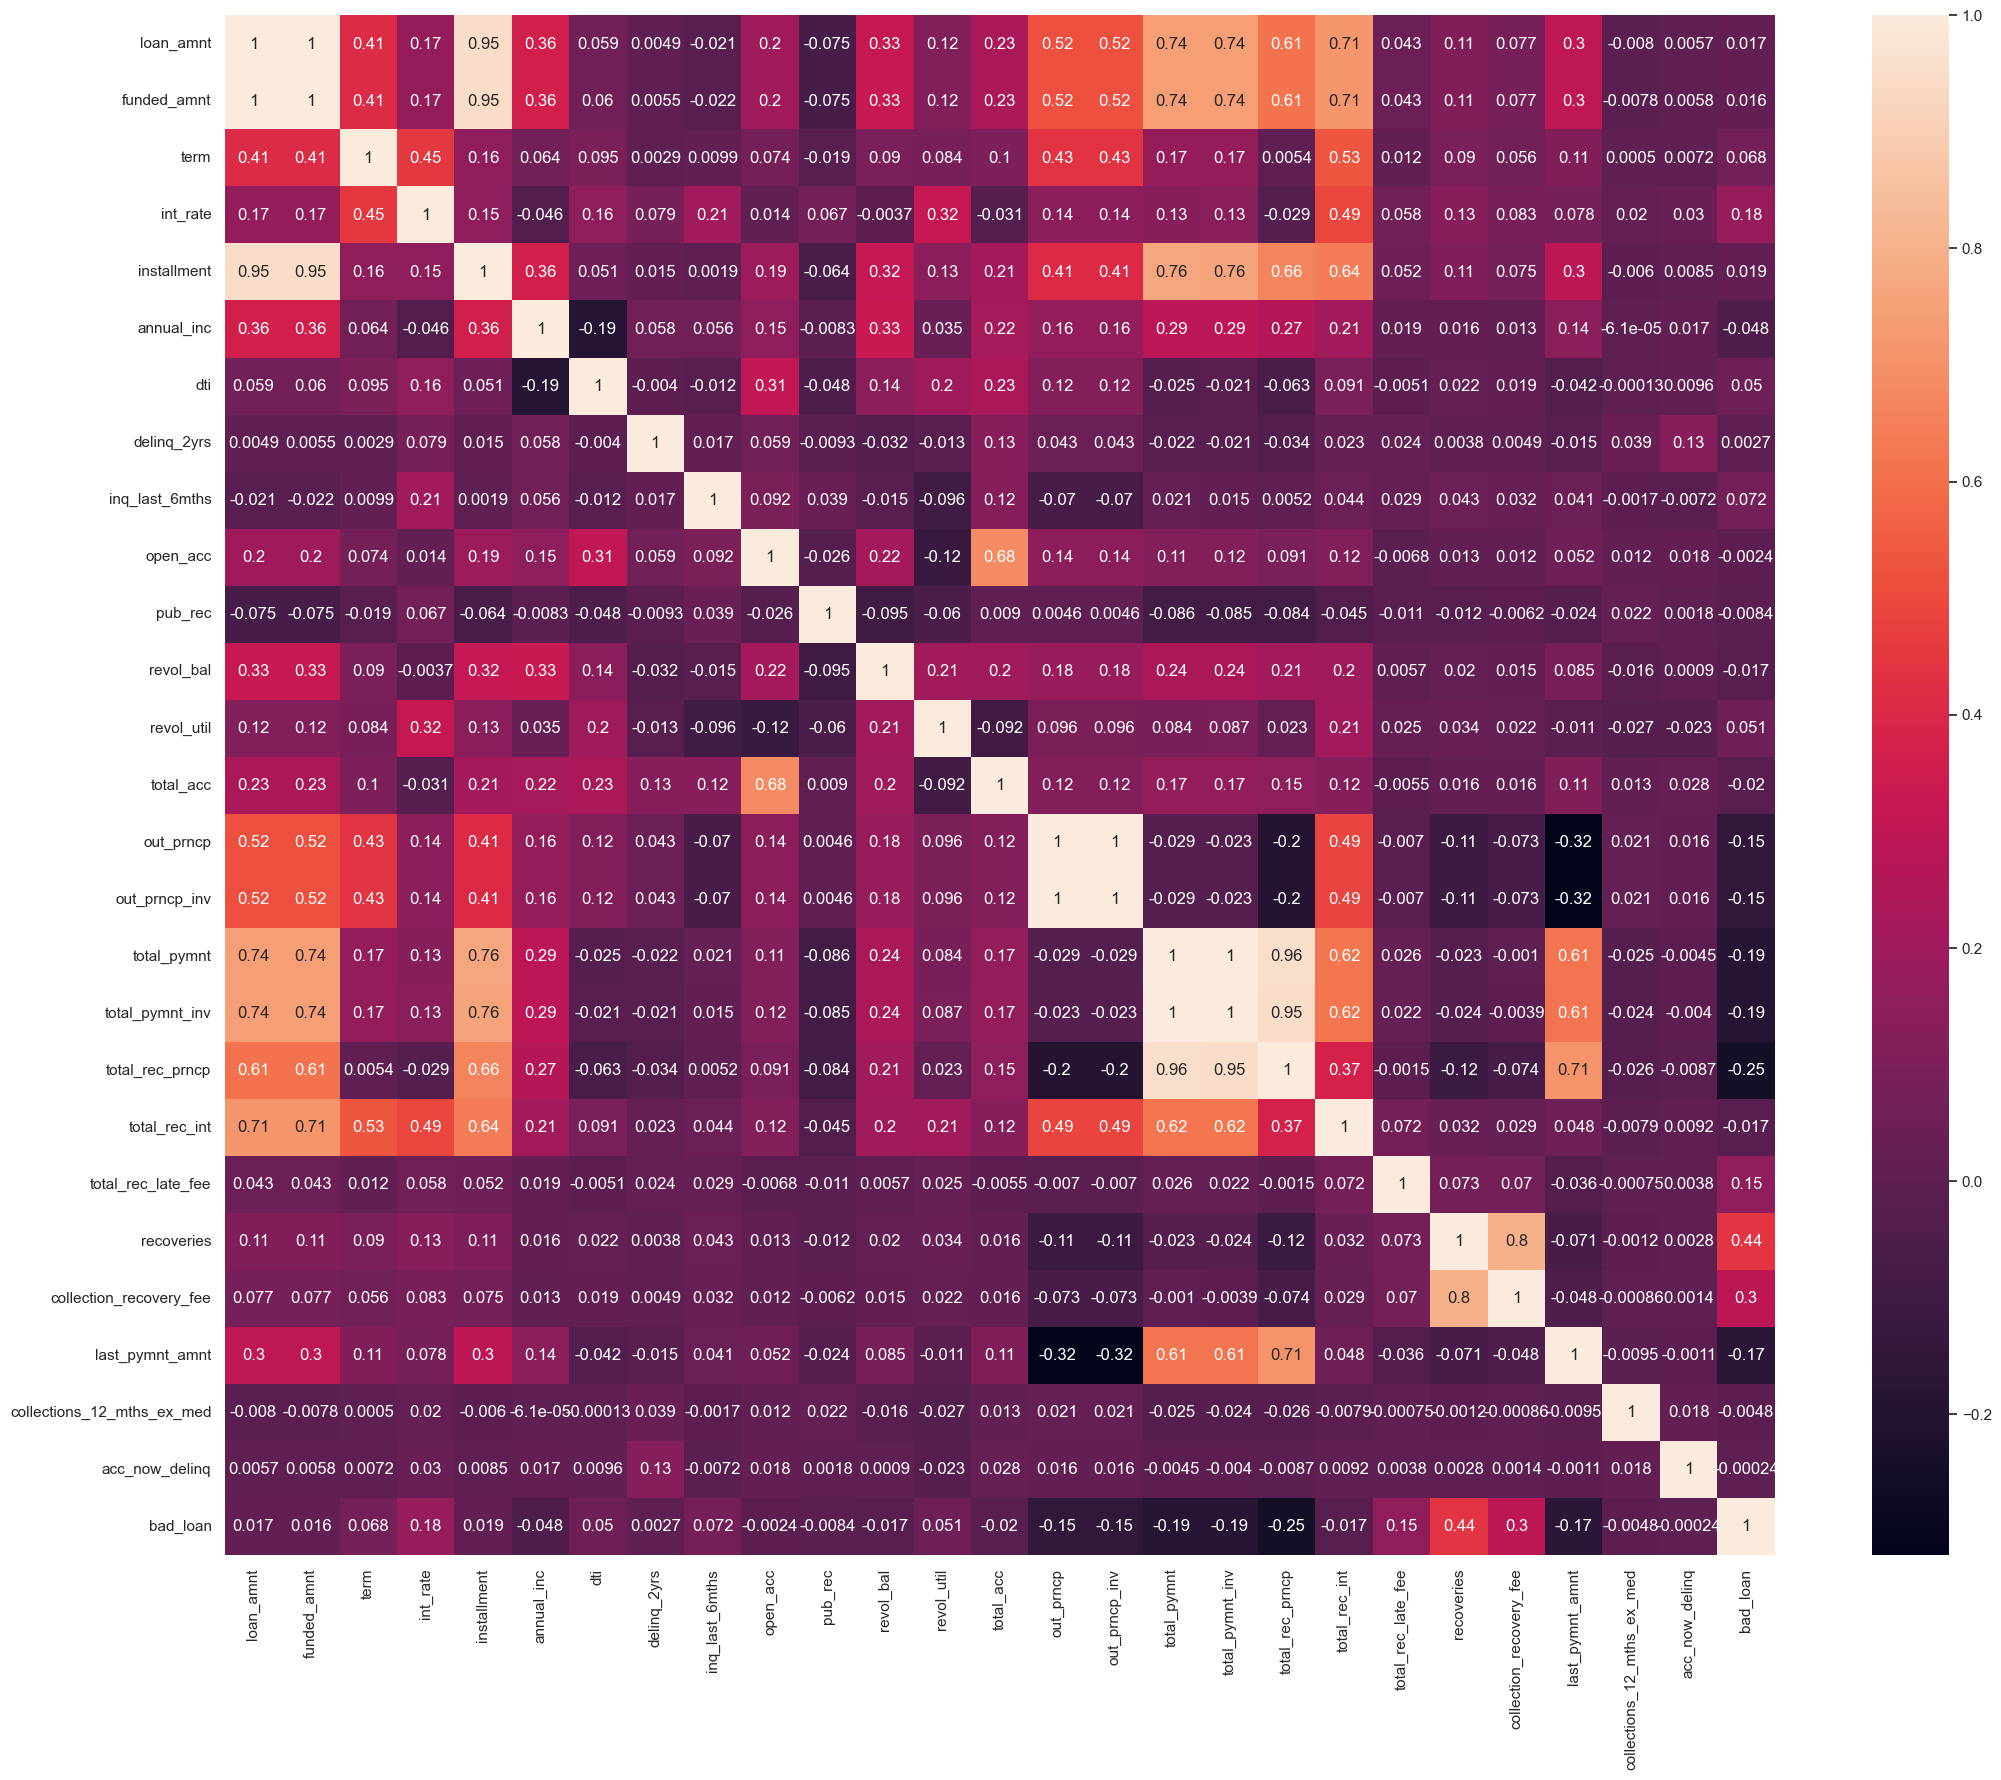

In [152]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)

In [153]:
filtered = ['recoveries', 'bad_loan']

df[filtered]

,recoveries,bad_loan
0,0.00,0
1,117.08,1
2,0.00,0
3,0.00,0
4,0.00,0
...,...,...
466280,0.00,0
466281,0.00,1
466282,0.00,0
466283,0.00,0


# Outlier Check

In [154]:
df_num = df.select_dtypes(exclude = object)

In [155]:
from scipy import stats
import pandas as pd

# Fungsi untuk mendeteksi outlier berdasarkan Z-score
def detect_outliers_zscore(df, column_name):
    z_scores = stats.zscore(df[column_name])
    outliers = df[(z_scores > 3) | (z_scores < -3)]
    return len(outliers)

# Menyaring kolom numerik
df_num = df.select_dtypes(include='number')

# Mencetak jumlah outlier untuk setiap kolom numerik
for column in df_num.columns:
    num_outliers = detect_outliers_zscore(df_num, column)
    print(f'Kolom: {column}, Jumlah Outlier: {num_outliers}')

Kolom: loan_amnt, Jumlah Outlier: 0
Kolom: funded_amnt, Jumlah Outlier: 0
Kolom: term, Jumlah Outlier: 0
Kolom: int_rate, Jumlah Outlier: 0
Kolom: installment, Jumlah Outlier: 5679
Kolom: annual_inc, Jumlah Outlier: 4649
Kolom: dti, Jumlah Outlier: 0
Kolom: delinq_2yrs, Jumlah Outlier: 10336
Kolom: inq_last_6mths, Jumlah Outlier: 4233
Kolom: open_acc, Jumlah Outlier: 4619
Kolom: pub_rec, Jumlah Outlier: 7615
Kolom: revol_bal, Jumlah Outlier: 5043
Kolom: revol_util, Jumlah Outlier: 19
Kolom: total_acc, Jumlah Outlier: 4338
Kolom: out_prncp, Jumlah Outlier: 7562
Kolom: out_prncp_inv, Jumlah Outlier: 7584
Kolom: total_pymnt, Jumlah Outlier: 8079
Kolom: total_pymnt_inv, Jumlah Outlier: 8114
Kolom: total_rec_prncp, Jumlah Outlier: 7202
Kolom: total_rec_int, Jumlah Outlier: 9166
Kolom: total_rec_late_fee, Jumlah Outlier: 6394
Kolom: recoveries, Jumlah Outlier: 8132
Kolom: collection_recovery_fee, Jumlah Outlier: 5182
Kolom: last_pymnt_amnt, Jumlah Outlier: 11910
Kolom: collections_12_mths_ex

In [156]:
# Menghitung Z-scores untuk setiap kolom dan menentukan outlier
z_scores = stats.zscore(df_num)

# Menentukan batas outlier (misalnya, z-score lebih dari 3 atau kurang dari -3)
outliers = (z_scores > 3) | (z_scores < -3)

# Mengambil baris yang tidak memiliki outlier
df_coba = df[~outliers.any(axis=1)]

In [157]:
df_coba.shape

(364162, 40)

In [158]:
df.shape

(444451, 40)

# Transform Categorical Data to Numerical

In [159]:
unqcol(cat)

grade  =  7
grade  =  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
------------------------------
emp_length  =  11
emp_length  =  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
------------------------------
home_ownership  =  4
home_ownership  =  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
------------------------------
verification_status  =  3
verification_status  =  ['Verified' 'Source Verified' 'Not Verified']
------------------------------
loan_status  =  9
loan_status  =  ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
------------------------------
pymnt_plan  =  2
pymnt_plan  =  ['n' 'y']
------------------------------
purpose  =  4
purpose  =  ['credit_card' 'other' 'debt_consolidation' 'home_improvement']
------------------------------
initial_list_status  =  2
ini

In [160]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Melakukan label encoding untuk setiap kolom kategori
df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# #one-hot-encoder
# s = (df.dtypes == 'object')
# cat = list(s[s].index)
# onehots = pd.get_dummies(df[cat], drop_first=True)

In [161]:
# Identifikasi kolom bertipe datetime64
datetime_columns = df_encoded.select_dtypes(include=[np.datetime64]).columns

# Hapus kolom datetime64 dari fitur
df_encoded = df_encoded.drop(columns=datetime_columns)

# Split Data

In [162]:
X = df_encoded.drop(['bad_loan','loan_status'], axis=1)
y = df_encoded['bad_loan']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((355560, 33), (88891, 33), (355560,), (88891,))

In [164]:
# # Handle Imbalance Target Using SMOTE

# sm = SMOTE(random_state=24)
# sm.fit(X_train, y_train)
# X_smote, y_smote = sm.fit_resample(X, y)
# X_smote.shape, y_smote.shape

# Spliting data to Training and Testing set

# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# X_train.shape, X_test.shape,y_train.shape, y_test.shape

In [165]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Feature Selection (Wrapper Methods)

In [166]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# # Melatih model
# model = LogisticRegression(max_iter=1000)
# rfe = RFE(model, n_features_to_select=10)
# fit = rfe.fit(X_train, y_train)

# # Mendapatkan fitur yang dipilih
# importances = fit.support_
# selected_features = X.columns[importances]

# print("Fitur yang dipilih:", selected_features)

Fitur yang dipilih: Index(
['loan_amnt', 'term', 'int_rate', 'grade', 'inq_last_6mths', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee'],
      
      dtype='object')

# Modelling

In [167]:
# Daftar fitur yang dipilih
selected_features_10 = ['loan_amnt', 'term', 'int_rate', 'grade', 'inq_last_6mths',
                      'out_prncp', 'total_pymnt', 'total_rec_prncp', 
                      'total_rec_int', 'total_rec_late_fee']

In [168]:
X = df_encoded[selected_features_10] 
y = df_encoded['bad_loan']
# Identifikasi kolom bertipe datetime64
datetime_columns = X.select_dtypes(include=[np.datetime64]).columns

# Hapus kolom datetime64 dari fitur
X = X.drop(columns=datetime_columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((355560, 10), (88891, 10), (355560,), (88891,))

In [169]:
# Handle Imbalance Target Using SMOTE (Oversampling)
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X, y)
X_smote.shape, y_smote.shape

((791104, 10), (791104,))

In [170]:
# Spliting data to Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((632883, 10), (158221, 10), (632883,), (158221,))

In [171]:
# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9192648257816598
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     79058
           1       0.98      0.86      0.91     79163

    accuracy                           0.92    158221
   macro avg       0.93      0.92      0.92    158221
weighted avg       0.93      0.92      0.92    158221



In [173]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8492804368573071
              precision    recall  f1-score   support

           0       0.98      0.71      0.83     79058
           1       0.77      0.99      0.87     79163

    accuracy                           0.85    158221
   macro avg       0.88      0.85      0.85    158221
weighted avg       0.88      0.85      0.85    158221



In [174]:
#XGB Classifier
model_xb = XGBClassifier(random_state=42, use_label_encoder=False)
model_xb.fit(X_train, y_train)
y_pred_xb = model_xb.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_xb))
print(classification_report(y_test, y_pred_xb))

Random Forest Accuracy: 0.8520676774890817
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     79058
           1       0.78      0.98      0.87     79163

    accuracy                           0.85    158221
   macro avg       0.88      0.85      0.85    158221
weighted avg       0.88      0.85      0.85    158221



In [175]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(X_train, y_train)
y_pred_gbm = model_gbm.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

Gradient Boosting Accuracy: 0.8132927993123542
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     79058
           1       0.74      0.95      0.84     79163

    accuracy                           0.81    158221
   macro avg       0.84      0.81      0.81    158221
weighted avg       0.84      0.81      0.81    158221



In [176]:
from sklearn.metrics import roc_auc_score

# Mendapatkan probabilitas prediksi untuk kelas positif dari setiap model
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
y_pred_proba_gbm = model_gbm.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
y_pred_proba_xb = model_xb.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif

# Menghitung ROC AUC Score untuk setiap model
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_gbm = roc_auc_score(y_test, y_pred_proba_gbm)
roc_auc_xb = roc_auc_score(y_test, y_pred_proba_xb)

# Menampilkan ROC AUC Scores
print("ROC AUC Score for Logistic Regression:", roc_auc_lr)
print("ROC AUC Score for Random Forest:", roc_auc_rf)
print("ROC AUC Score for Gradient Boosting:", roc_auc_gbm)
print("ROC AUC Score for XGBoost:", roc_auc_xb)

ROC AUC Score for Logistic Regression: 0.9696001858284673
ROC AUC Score for Random Forest: 0.9810121811952174
ROC AUC Score for Gradient Boosting: 0.9584132313020364
ROC AUC Score for XGBoost: 0.9849698595285113


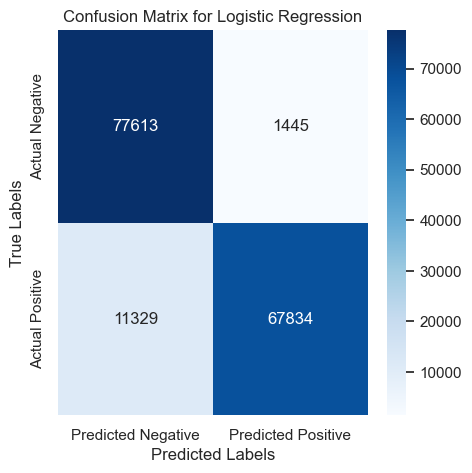

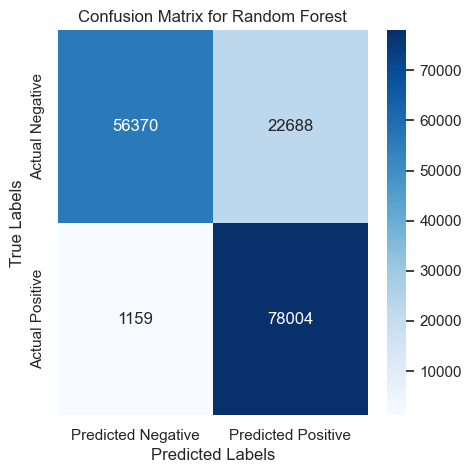

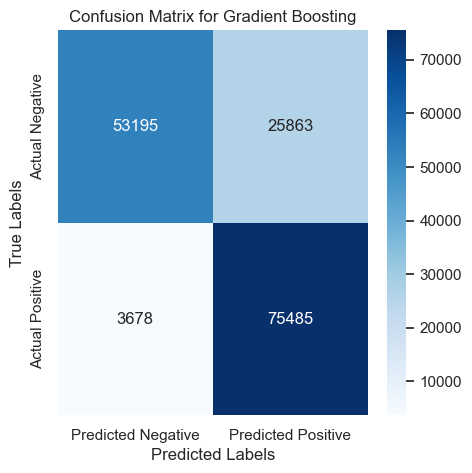

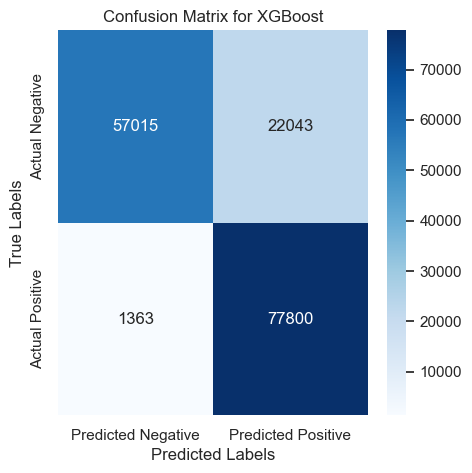

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Plot untuk Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, title='Confusion Matrix for Logistic Regression')

# Plot untuk Random Forest
plot_confusion_matrix(y_test, y_pred_rf, title='Confusion Matrix for Random Forest')

# Plot untuk Gradient Boosting
plot_confusion_matrix(y_test, y_pred_gbm, title='Confusion Matrix for Gradient Boosting')

# Plot untuk XGBoost
plot_confusion_matrix(y_test, y_pred_xb, title='Confusion Matrix for XGBoost')

# Memilih Model Random Forest

In [178]:
#Random Forest Terbaik

#Random Forest Model
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
confusion = confusion_matrix(y_test, y_pred_rf)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

print('Confusion Matrix:')
print(confusion)

Accuracy: 0.85
Precision: 0.77
Recall: 0.99
F1-score: 0.87
Confusion Matrix:
[[56370 22688]
 [ 1159 78004]]


In [179]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5)  # 5-fold cross-validation
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", cv_scores.mean())

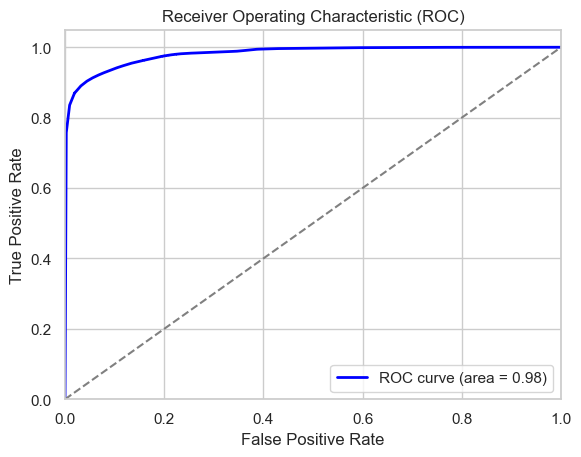

In [180]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Feature Importance

In [181]:
feature_names = ['loan_amnt', 'term', 'int_rate', 'grade', 'inq_last_6mths',
                      'out_prncp', 'total_pymnt', 'total_rec_prncp', 
                      'total_rec_int', 'total_rec_late_fee']

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Menggunakan DataFrame sementara untuk menampilkan hasil
importance_df = pd.DataFrame({
    'Feature': np.array(feature_names)[indices],
    'Importance': importances[indices]
})

print(importance_df)

              Feature  Importance
0     total_rec_prncp    0.269533
1           out_prncp    0.220649
2      inq_last_6mths    0.141677
3           loan_amnt    0.099192
4         total_pymnt    0.080379
5       total_rec_int    0.060209
6  total_rec_late_fee    0.058656
7            int_rate    0.048747
8               grade    0.011627
9                term    0.009331


In [182]:
feature_names2 = ['loan_amnt', 'term', 'int_rate', 'grade', 'inq_last_6mths',
                      'out_prncp', 'total_pymnt', 'total_rec_prncp', 
                      'total_rec_int', 'total_rec_late_fee','bad_loan']

In [183]:
df[feature_names2]

,loan_amnt,term,int_rate,grade,inq_last_6mths,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,bad_loan
0,5000,36,10.65,B,1.0,0.00,5861.071414,5000.00,861.07,0.00,0
1,2500,60,15.27,C,5.0,0.00,1008.710000,456.46,435.17,0.00,1
2,2400,36,15.96,C,2.0,0.00,3003.653644,2400.00,603.65,0.00,0
3,10000,36,13.49,C,1.0,0.00,12226.302210,10000.00,2209.33,16.97,0
4,3000,60,12.69,B,0.0,766.90,3242.170000,2233.10,1009.07,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60,14.47,C,2.0,12574.00,10383.360000,5826.00,4557.36,0.00,0
466281,22000,60,19.97,D,5.0,0.00,4677.920000,1837.04,2840.88,0.00,1
466282,20700,60,16.99,D,2.0,14428.31,12343.980000,6271.69,6072.29,0.00,0
466283,2000,36,7.90,A,1.0,0.00,2126.579838,2000.00,126.58,0.00,0


# Tuning

In [184]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)


In [185]:
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression

# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
#     ('gbm', GradientBoostingClassifier(n_estimators=100, random_state=42))
# ]
# stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
# stacking_model.fit(X_train, y_train)
# y_pred_stacking = stacking_model.predict(X_test)
# print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stacking))

NOTE : Dapat Dilakukan Hyperparameter Tuning dan Feature Selection Lebih Lanjut